In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stocks = ["MSFT", "COST", "AMD"]
start_date = "2010-01-01"
end_date = "2025-01-01"
data = yf.download(stocks, start = start_date, end = end_date, interval = "1d", group_by = "tickers")
data = data.dropna()
data.to_csv("stocks.csv")


[*********************100%***********************]  3 of 3 completed


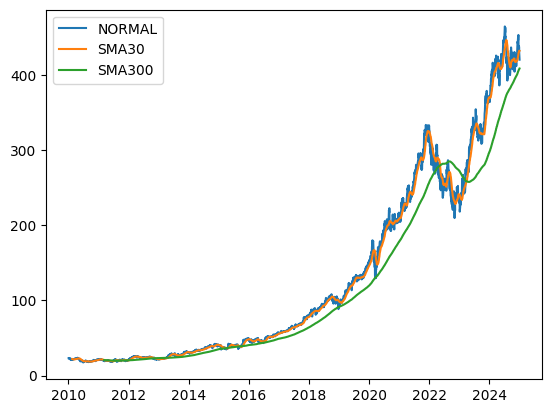

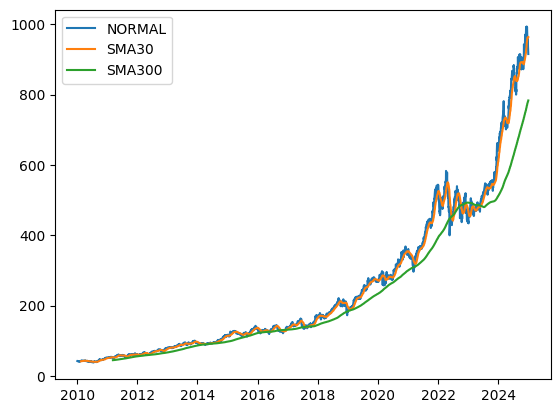

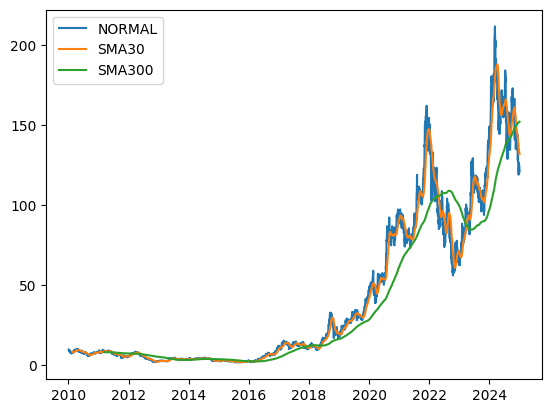

In [13]:
for stock in stocks:
    data[(stock, "SMA30")] = data[(stock, "Close")].rolling(window=30).mean()
    data[(stock, "SMA300")] = data[(stock, "Close")].rolling(window=300).mean()
    plt.plot(data[(stock, 'Close')], label = "NORMAL")
    plt.plot(data[(stock, 'SMA30')], label = "SMA30")
    plt.plot(data[(stock, 'SMA300')], label = "SMA300")
    plt.legend()
    plt.show()
data.columns.names = ["Ticker", "Statistic"]


# print((data.head(2)))
# print(data[("MSFT", "Close")].isna().sum())


In [ ]:
signals = pd.DataFrame({"date": data.index}).set_index("date")
for ticker in stocks:
    signal = data[(ticker, "SMA30")] - data[(ticker, "SMA300")]


DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='date', length=3774, freq=None)
